<a href="https://colab.research.google.com/github/Belal-AI/Rev-Projects/blob/main/Xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb

In [2]:
train_data=pd.read_csv("/content/sample_data/california_housing_train.csv")

In [3]:
test_data=pd.read_csv("/content/sample_data/california_housing_test.csv")

In [4]:
y=train_data.iloc[:,-1]

In [5]:
X=train_data.iloc[:,:-1]

In [6]:
house_data=xgb.DMatrix(data=X,label=y)

In [7]:
house_data

In [8]:
params={"objective":"reg:linear","max_depth":3}

In [9]:
errors=xgb.cv(dtrain=house_data,params=params,nfold=3, num_boost_round=10,seed=123)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:43:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [10]:
errors

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,99990.815977,88.552656,100251.844726,147.181900
1,90215.044392,243.459386,90659.851855,443.164515
2,83762.267268,656.404902,84331.467750,803.658746
3,79116.712039,583.108175,79748.494657,639.501860
4,76173.616062,526.101271,76922.166419,841.275662
5,73654.484395,654.235600,74481.953366,779.989352
6,71306.111217,1720.209277,72215.175678,465.986103
7,68831.110245,954.359735,69799.649533,1175.889660
8,66823.441876,827.837738,67866.558799,598.362882
9,65147.529458,482.306491,66210.136000,1024.162182


In [11]:
params={"booster":"gblinear","objective":"reg:linear"}

In [12]:
errors=xgb.cv(dtrain=house_data,params=params,nfold=3, num_boost_round=10,seed=123)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:43:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [13]:
errors

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,112535.426585,102.186149,112540.505780,252.488054
1,107848.722241,71.614364,107852.150315,145.340306
2,103829.374806,76.640002,103833.884703,106.913255
3,100345.118114,138.784439,100350.657089,138.251923
4,97356.279364,200.849761,97362.464449,186.512518
5,94791.377750,252.675286,94798.040099,238.940640
6,92588.384220,294.431769,92595.469972,290.765959
7,90693.819775,327.466717,90701.336718,340.121669
8,89061.769976,353.258070,89069.761508,386.192111
9,87652.983263,373.171909,87661.515598,428.640040


In [14]:
import matplotlib.pylab as plt

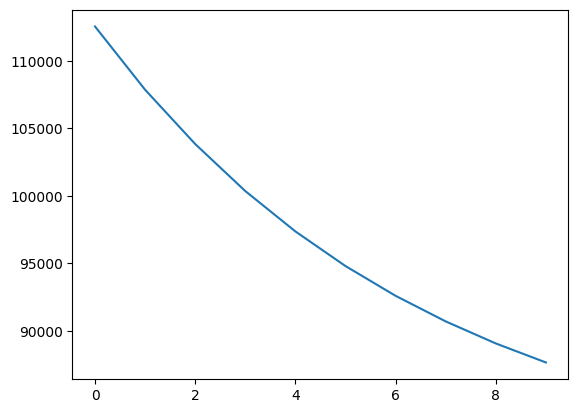

In [15]:
plt.plot(errors["train-rmse-mean"])

Regularization

In [16]:
params={"objective":"reg:linear","max_depth":3}

In [17]:
alpha=[1,10,100]
results=[]
for i in alpha:
  params['alpha']=i
  results.append(xgb.cv(dtrain=house_data,params=params,nfold=3, num_boost_round=10,seed=123))



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:43:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:43:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:43:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [18]:
results

[   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
 0     99990.815977       88.552656   100251.844726     147.181900
 1     90215.044589      243.459622    90659.852087     443.164256
 2     83762.267419      656.405115    84331.467925     803.658712
 3     79116.712192      583.108241    79748.494818     639.501747
 4     76173.616238      526.101253    76922.166581     841.275636
 5     73654.484597      654.235620    74481.953503     779.989341
 6     71306.111436     1720.209275    72215.175844     465.986160
 7     68831.110468      954.359761    69799.649684    1175.889774
 8     66823.442118      827.837727    67866.558972     598.362931
 9     65147.529738      482.306414    66210.136239    1024.162385,
    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
 0     99990.816363       88.552813   100251.845070     147.181808
 1     90215.046280      243.460479    90659.853708     443.163349
 2     83762.269177      656.405136    84331.469560     803.6

Visualization

In [19]:
xgba=xgb.train(params=params, dtrain=house_data, num_boost_round=10)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:44:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

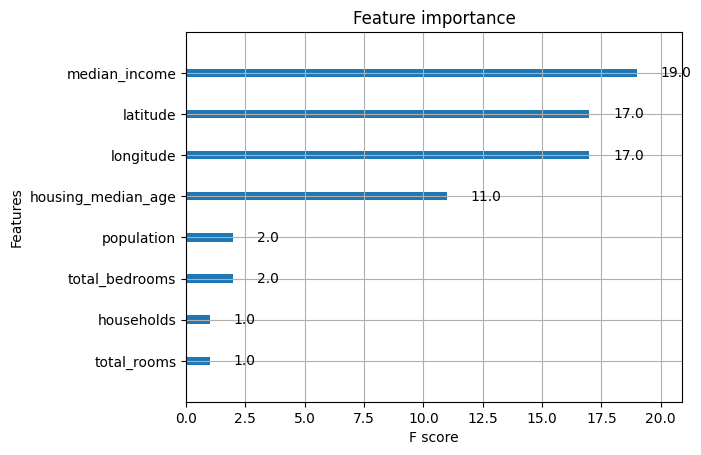

In [20]:
xgb.plot_importance(xgba)